#### 29.09.22, &copy; [Daniil Tereshchenko](https://www.linkedin.com/in/daniil-tereshchenko/), 2022

# Лабораторна робота №2. Аналіз складності алгоритмів (short version)

__Мета:__ _Освоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну._

#### Що я буду вміти?
* Виконувати асимптотичний аналіз складності алгоритмів.
* Досліджувати часову складінсть алгоритмів емпіричним шляхом засобами мови Python.
* Вибирати оптимальний алгоритм.
* Генерувати випадкові послідовності чисел засобами Python
* Будувати графіки засобами бібліотеки matplotlib

## Оцінка часу роботи програми на мові Python
Відомо, що оцінка асимптотичної складності алгоритму сортування методом включення (див. рис.) (вставки) дорівнює $O(n^2)$
, тобто при збільшенні розміру задачі у два рази, час на її виконання збільшується вчетверо.
Іноді корисно вміти оцінювати час виконання алгоритму на практиці, особливо у випадку, коли необхідно порівняти різні алгоритми з однаковою аисмптотикою при малих розмірах задачі.

![Сортування методом включення](image/Insertion-sort.gif)

Один з можливих підходів оцінки часу виконання програми, написаної на Python, може бути реалізований за допомогою пакету time.
Нижче наведено код процедури на Python, який реалізує алгоритм сортування методом вставки, і дозволяє оцінити час її виконання.

In [73]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt
array = [5,10,50,100,500,1000,2000,3000,4000,5000,10000,20000,50000,100000]

# Кріейтим пусті списки для подальшого наповнення їх часом виконання алгоритмів
time_data1 = []
time_data2 = []

In [74]:
start_time2 = time.time()

def booble(A):
    for i in range(len(A)-1):                     #| c1 | n
        for j in range(len(A)-i-1):               #| c2 | sum_j=0 > n(t_j)
            if A[j] > A[j+1]:                     #| c3 | sum_j=0 > n(t_j -1)
                A[j], A[j+1] = A[j+1], A[j]       #| c4 | sum_j=0 > n(t_j -1)
                
booble(array)

print("--- %s seconds ---" % (time.time() - start_time2))

time2 = (time.time() - start_time2)

--- 0.00011301040649414062 seconds ---


$$
T(n) = c_{1}n + c_{2}\sum_{j=0}^{n} t_{j} + c_{3}\sum_{j=0}^{n} (t_{j}-1) +  c_{4}\sum_{j=0}^{n} (t_{j}-1)
$$

$$
\sum_{j=0}^{n} j = \frac{n^2}{2}
$$

$$
\sum_{j=0}^{n} j = \frac{n(n-1)}{2}
$$

$$
T(n) = c_{1}n + c_{2}\frac{n^2}{2} + c_{3}\frac{n^2}{2} - c_{3}\frac{n}{2} + c_{4}\frac{n^2}{2} - c_{4}\frac{n}{2}
$$

$$
T(n) = n^2(\frac{c_{2}}{2} + \frac{c_{3}}{2} + \frac{c_{4}}{2}) + n(c_{1} - c_{3} - c_{4}) 
$$


Тепер функція $T(n)$ - квадратична, тобто має вид $T(n) = an^2 + bn + c$. (Константи $a$, $b$ і $c$ визначаються значеннями $c_{1}-c_{4}$.)

In [75]:

start_time3 = time.time()

def insertion_sort(A):
    for j in range(1, len(A)):                     #| c1 | n
        key = A[j]                                 #| c2 | n - 1
        i = j - 1                                  #| c3 | n - 1
        while i >= 0 and A[i] > key:               #| c4 | sum_j=2 > n(t_j)
            A[i + 1] = A[i]                        #| c5 | sum_j=2 > n(t_j-1)
            i -= 1                                 #| c6 | sum_j=2 > n(t_j-1)
        A[i + 1] = key                             #| c7 | n - 1

insertion_sort(array)

print("--- %s seconds ---" % (time.time() - start_time3))

time3 = (time.time() - start_time3)

--- 0.00010609626770019531 seconds ---


$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{5}\sum_{j=2}^{n} (t_{j}-1) + c_{6}\sum_{j=2}^{n} (t_{j}-1) + c_{7}(n-1)
$$
Розглянемо найсприятливіші умови для цього алгоритму. При відсортованому масимі всі $t_{j} = 1$ а, отже $t_{j} -1 = 0$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{7}(n-1)
$$
$$
\sum_{j=2}^{n} j = n - 1
$$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}(n-1) + c_{7}(n-1)
$$
$$
T(n) = n(c_{1} + c_{2} + c_{3} + c_{4} + c_{7}) - (c_{2} + c_{3} + c_{4} + c_{7})
$$

Тепер функція $T(n)$ - лінійна, тобто має вид $T(n) = an + b$. (Константи $a$ і $b$ визначаються значеннями $c_{1}-c_{7}$.)

In [76]:
start_time = time.time()
for y in range(0, len(array)):

    # Створюємо масив випадкових даних у ренджі від 1 до 100001
    random_list = random.sample(range(1, 100001), array[y])

    # Виконуємо сортування бульбашкою і зберігаємо час виконання
    start_time1 = time.time()

    def booble(A):
        for i in range(len(A)-1):                     #| c1 | n
            for j in range(len(A)-i-1):               #| c2 | sum_j=0 > n(t_j)
                if A[j] > A[j+1]:                     #| c3 | sum_j=0 > n(t_j -1)
                    A[j], A[j+1] = A[j+1], A[j]       #| c4 | sum_j=0 > n(t_j -1)

    booble(random_list)

    time_data1.append((time.time() - start_time1))
    # Виконуємо сортування вставок і зберігаємо час виконання
    start_time2 = time.time()

    def insertion_sort(A):
        for jj in range(1, len(A)):                     #| c1 | n
            key = A[jj]                                 #| c2 | n - 1
            ii = jj - 1                                  #| c3 | n - 1
            while ii >= 0 and A[ii] > key:               #| c4 | sum_j=2 > n(t_j)
                A[ii + 1] = A[ii]                        #| c5 | sum_j=2 > n(t_j-1)
                ii -= 1                                 #| c6 | sum_j=2 > n(t_j-1)
            A[ii + 1] = key                             #| c7 | n - 1

    insertion_sort(random_list)


    time_data2.append((time.time() - start_time2))

main_time = time.time() - start_time


In [92]:
from matplotlib.pyplot import figure

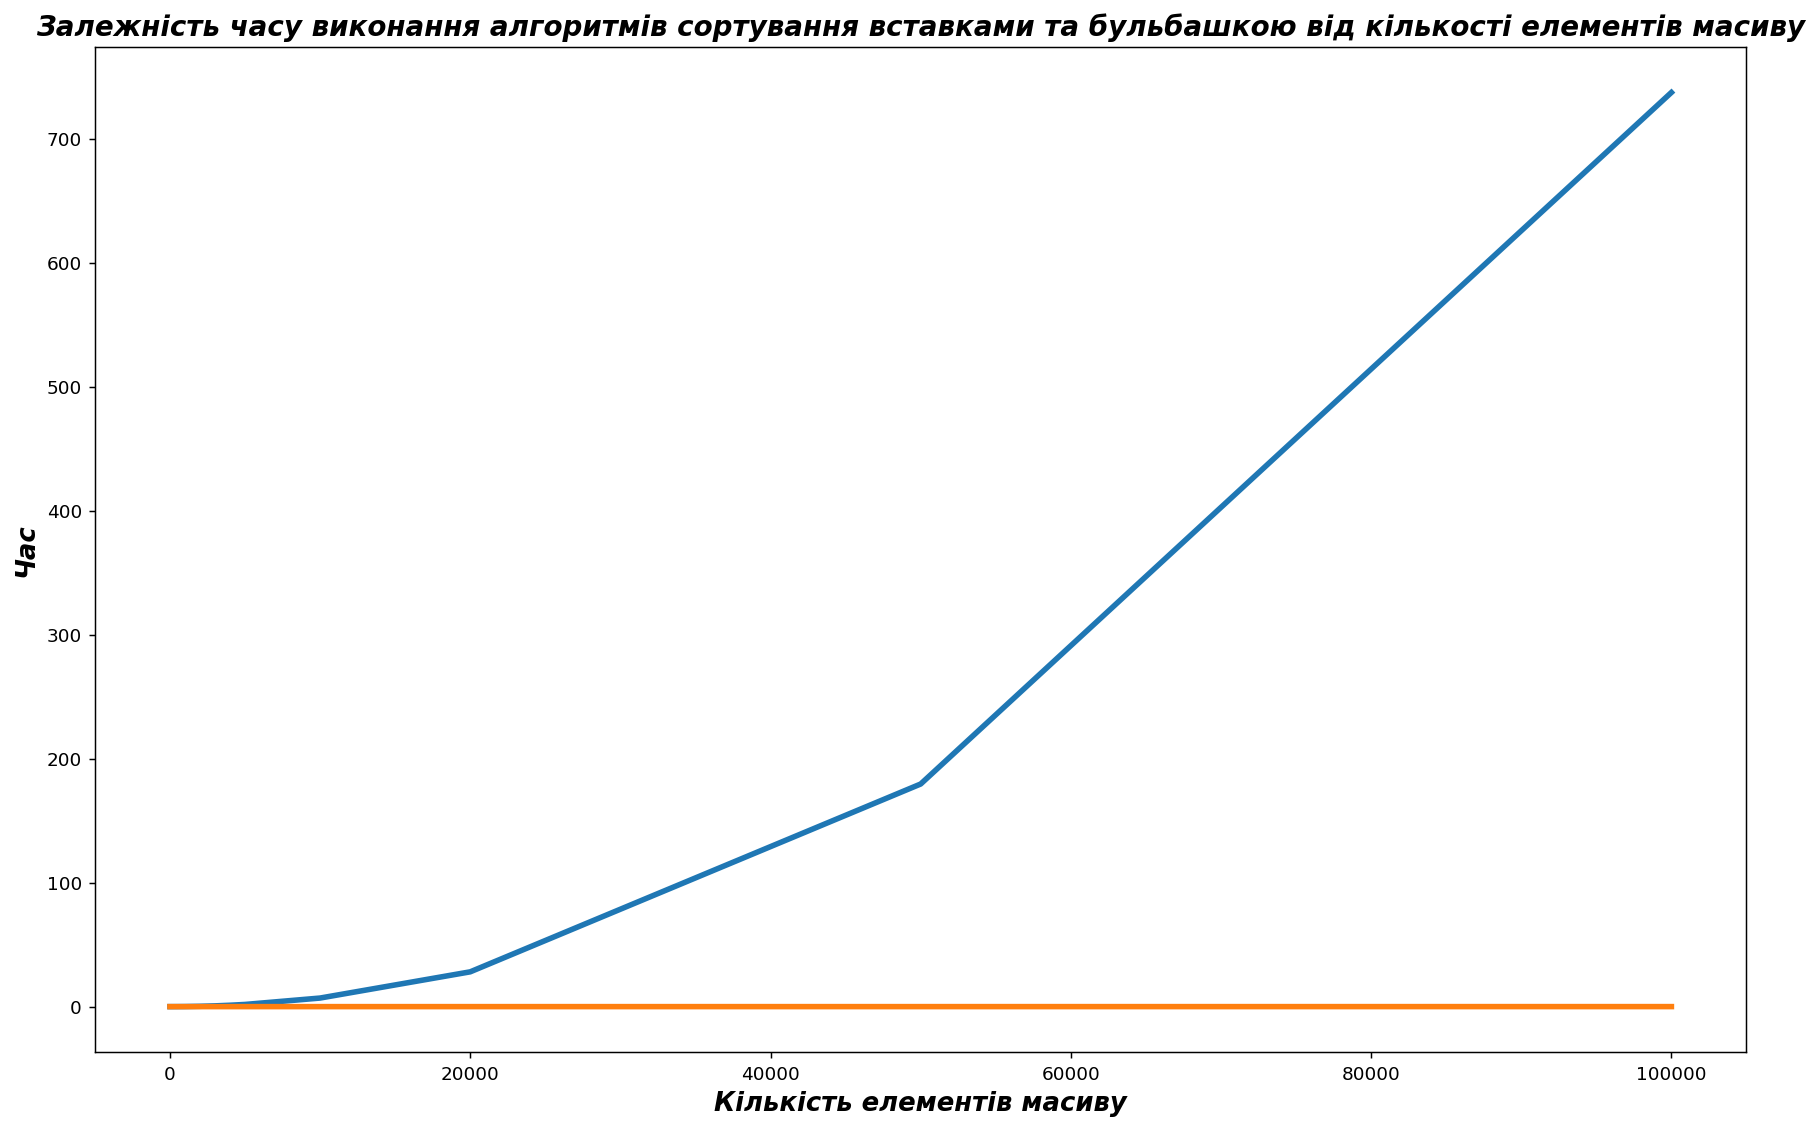

In [126]:
figure(figsize=(16,10), dpi = 133.19)
plt.title("Залежність часу виконання алгоритмів сортування вставками та бульбашкою від кількості елементів масиву", fontsize = 15,fontstyle='italic', fontweight='bold')
plt.xlabel("Кількість елементів масиву", fontsize = 14,fontstyle='italic', fontweight='bold')
plt.ylabel("Час", fontsize = 14,fontstyle='italic', fontweight='bold')
plt.plot(array, time_data1, array, time_data2, linewidth = 3)
plt.savefig('Time_Count_normal.jpg', bbox_inches='tight')

Цікаво. У мене обробка чанку коду вище зайняла 955.8882145881653 секунди, тобто майже 16 хвилин. Це все вказує на те що алгоритми з квадратичними функціями не мають еффективності. Саме це ви можете побачити на візуалізації

In [128]:
main_time

955.8882145881653

А тепер давайте спробуємо "пришвидшити" алгоритм сортування бульбашкою у 10000 раз і подивитися на результат ще раз

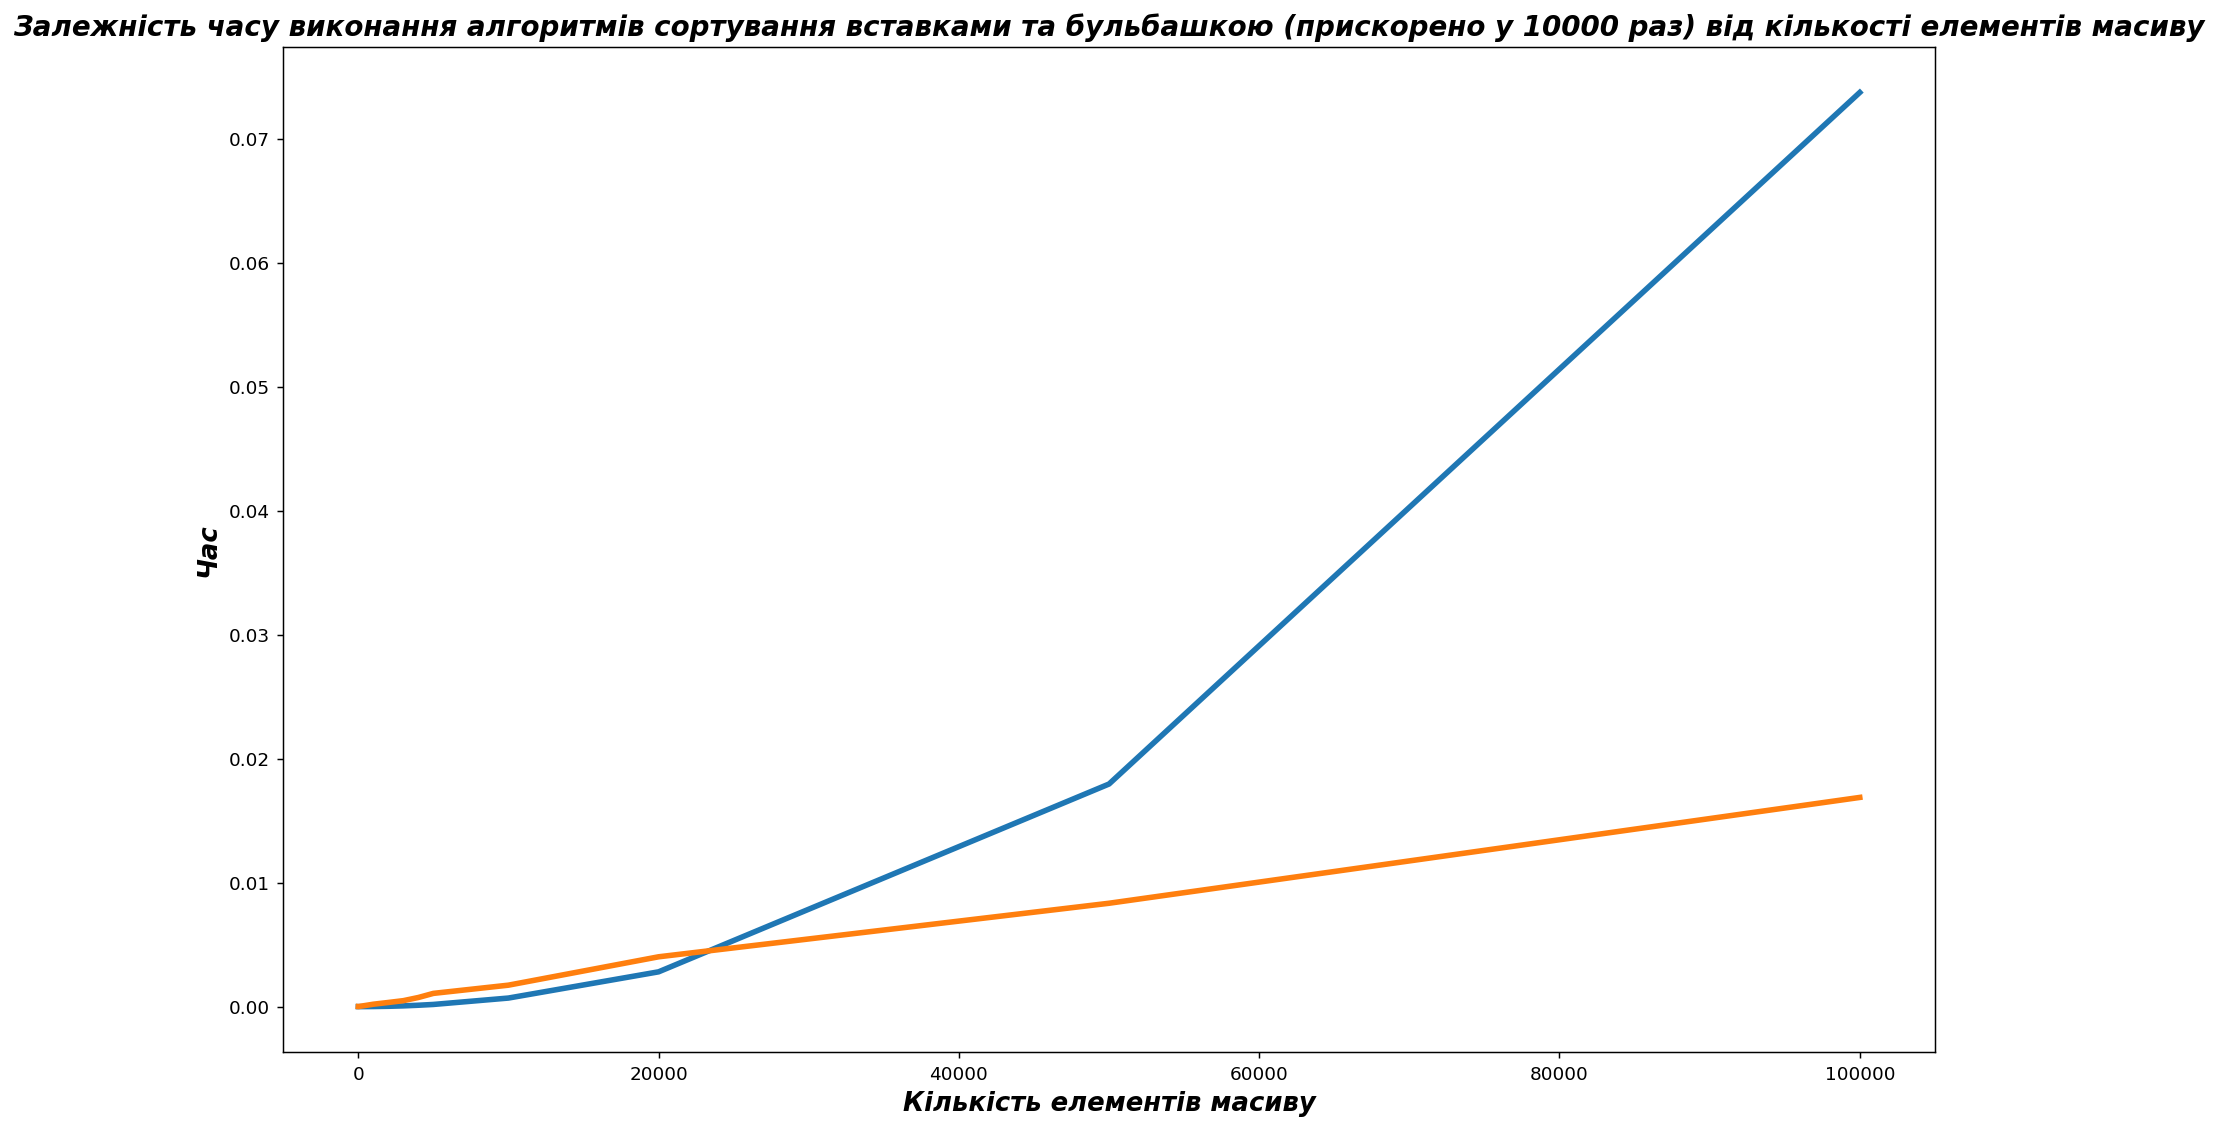

In [127]:
time_data1_faster = time_data1
time_data1_faster = [element / 10000 for element in time_data1_faster]

figure(figsize=(16,10), dpi = 133.19)
plt.title("Залежність часу виконання алгоритмів сортування вставками та бульбашкою (прискорено у 10000 раз) від кількості елементів масиву", fontsize = 15,fontstyle='italic', fontweight='bold')
plt.xlabel("Кількість елементів масиву", fontsize = 14,fontstyle='italic', fontweight='bold')
plt.ylabel("Час", fontsize = 14,fontstyle='italic', fontweight='bold')
plt.plot(array, time_data1_faster, array, time_data2, linewidth = 3)
plt.savefig('Time_Count_faster.jpg', bbox_inches='tight')

Так. Алгоритм у 10000 раз швидший, але всеодно вставки перемогають це змагання! Ось це один із яскравих прикладів про "найшвидший процессор, крутіший програмість, машинний код і тд, а всеодно квадратичні алгоритми будуть працювати повільніше"

### Контрольні запитання

1. Що таке $O$ - нотація і чим вона відрізняється від $\Omega$- нотації?
    * Якщо алгоритм має складність $O(n)$ то його ефективінсть $\le n$ і навпаки коли має складність $Omega(n)$ то його ефективність $\ge n$
2. Яку часову складність має алгоритм сортування методом вставки за найсприятливішої умови, коли масив відсортовано? Відповідь обгрунтувати.

    * Розглянемо найсприятливіші умови для цього алгоритму. При відсортованому масимі всі $t_{j} = 1$ а, отже $t_{j} -1 = 0$
    * Отже алгоритм має складніть $O(n)$, доведення чому:
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{7}(n-1)
$$
$$
\sum_{j=2}^{n} j = n - 1
$$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}(n-1) + c_{7}(n-1)
$$
$$
T(n) = n(c_{1} + c_{2} + c_{3} + c_{4} + c_{7}) - (c_{2} + c_{3} + c_{4} + c_{7})
$$
3. Дати визначення ефективного алогоритму.
    * Ефективний алгоритм - це, за умови того, що ми приймаємо фактор швидкості обчислень як умову ефективності, алгоритм який працює за час меньший, ніж його аналог. Або ж має складність $O(1)$. Ефективним алгоритмом у виборі між $O(n^2)$ та $O(logn)$ буде алгоритм зі складністю $O(logn)$
4. Пояснити поняття головного параметра (розміру) задачі.
    * Головний параметр задачі - змінна яка вказує на кількість елементів або обʼєктів. наприклад booble_srt(N) де N це масив який треба відсортувати.
5. Функція часової складності має вигляд $F(N) = N^3 + 7N^2 - 14N$. Як записати асимптотичну складність в нотації $O()$?
    * $O(n^2)$
